In [1]:
# pip install wordcloud
# pip install nltk
# pip install gensim 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 


In [3]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amuke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amuke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amuke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np


In [5]:
data=pd.read_csv(r"C:\Users\amuke\Desktop\datasets\IMDB Dataset.csv\IMDB Dataset.csv")

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())




Missing Values:
review       0
sentiment    0
dtype: int64


In [8]:
# Basic statistics about the dataset
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


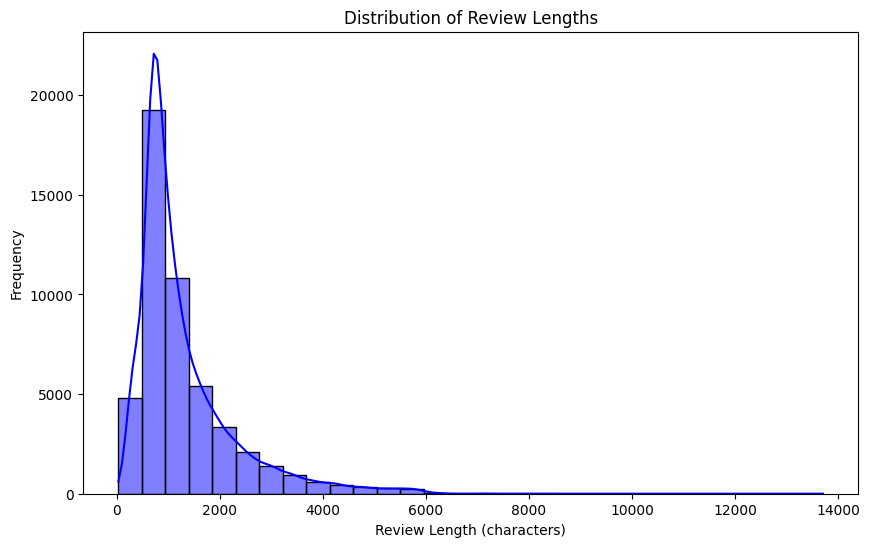

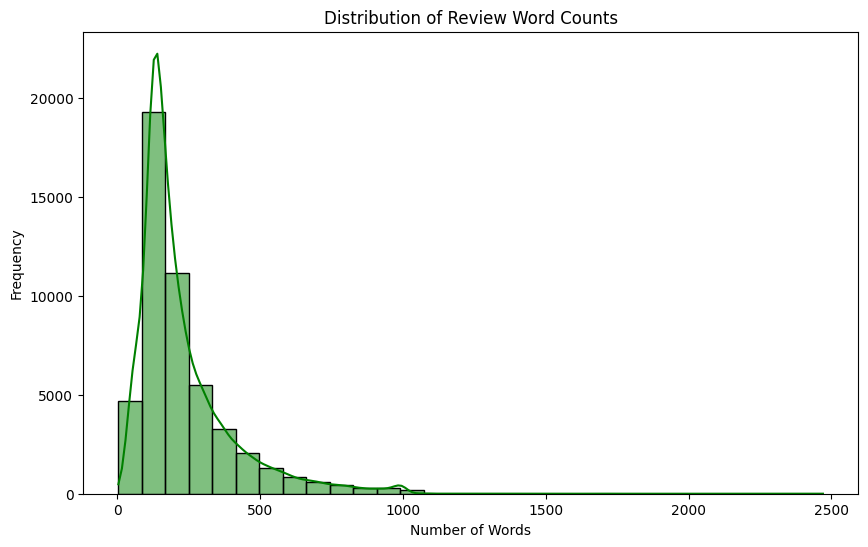

In [9]:
# Add columns for review lengths
data['review_length'] = data['review'].apply(len)
data['word_count'] = data['review'].apply(lambda x: len(x.split()))

# Plot review length distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (characters)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True, color='green')
plt.title("Distribution of Review Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


C:\Users\amuke\AppData\Local\Temp\ipykernel_17432\1674004779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


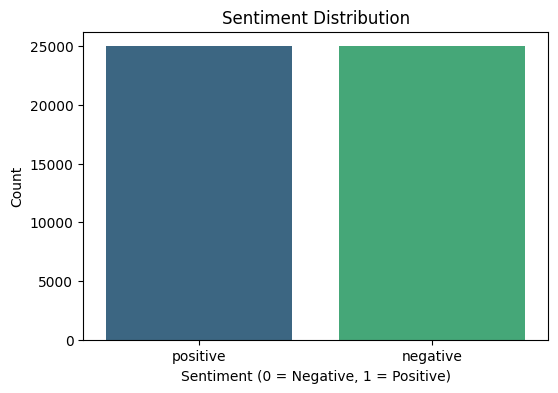

In [10]:
# Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


In [11]:
from bs4 import BeautifulSoup
lem=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text=re.sub(r'[^a-zA-Z]',' ',text)
    text=text.lower()
    tokens=text.split()
    tokens=[lem.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
# Apply the cleaning function to the 'review' column
data['cleaned_review'] = data['review'].apply(clean_text)

# Display the cleaned text
print("\nCleaned Reviews:")
print(data[['review', 'cleaned_review']].head())

C:\Users\amuke\AppData\Local\Temp\ipykernel_17432\2481995779.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()



Cleaned Reviews:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


In [25]:
from collections import Counter

# Tokenize words for positive and negative reviews
positive_words = ' '.join(data[data['sentiment'] == 'positive']['cleaned_review']).split()
negative_words = ' '.join(data[data['sentiment'] == 'negative']['cleaned_review']).split()

# Count the frequency of words
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Display the most common words
print("Most Common Words in Positive Reviews:")
print(positive_word_counts.most_common(10))

print("\nMost Common Words in Negative Reviews:")
print(negative_word_counts.most_common(10))


Most Common Words in Positive Reviews:
[('film', 49693), ('movie', 44836), ('one', 28280), ('like', 18193), ('time', 16310), ('good', 15089), ('story', 14181), ('character', 14020), ('great', 13009), ('see', 12926)]

Most Common Words in Negative Reviews:
[('movie', 58403), ('film', 43735), ('one', 27152), ('like', 22927), ('even', 15244), ('time', 15146), ('good', 14763), ('bad', 14714), ('character', 14324), ('would', 14005)]


C:\Users\amuke\AppData\Local\Temp\ipykernel_17432\3585741002.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(positive_top_words.values()), y=list(positive_top_words.keys()), palette='Greens_r')


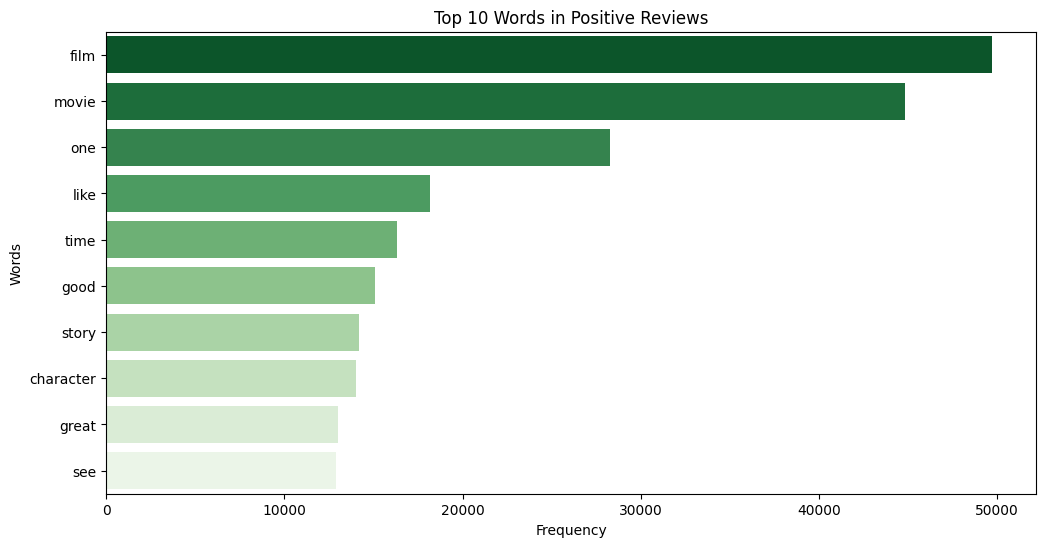

C:\Users\amuke\AppData\Local\Temp\ipykernel_17432\3585741002.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(negative_top_words.values()), y=list(negative_top_words.keys()), palette='Reds_r')


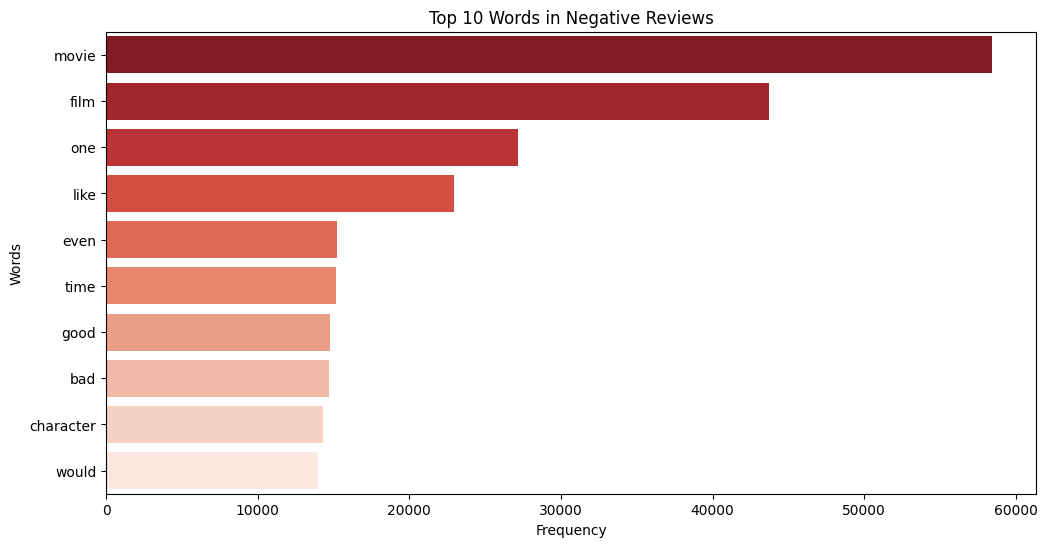

In [26]:
# Prepare data for visualization
positive_top_words = dict(positive_word_counts.most_common(10))
negative_top_words = dict(negative_word_counts.most_common(10))

# Plot bar charts for positive reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=list(positive_top_words.values()), y=list(positive_top_words.keys()), palette='Greens_r')
plt.title("Top 10 Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plot bar charts for negative reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=list(negative_top_words.values()), y=list(negative_top_words.keys()), palette='Reds_r')
plt.title("Top 10 Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top bigrams
top_bigrams = get_top_ngrams(data['cleaned_review'], n=10, ngram_range=(2, 2))
print("Top 10 Bigrams:")
for bigram, freq in top_bigrams:
    print(f"{bigram}: {freq}")

# Top trigrams
top_trigrams = get_top_ngrams(data['cleaned_review'], n=10, ngram_range=(3, 3))
print("\nTop 10 Trigrams:")
for trigram, freq in top_trigrams:
    print(f"{trigram}: {freq}")


Top 10 Bigrams:
look like: 3023
year old: 2368
special effect: 2325
movie like: 2127
main character: 1927
low budget: 1842
movie seen: 1770
good movie: 1737
horror movie: 1631
waste time: 1548

Top 10 Trigrams:
worst movie seen: 560
new york city: 277
worst film seen: 254
world war ii: 231
based true story: 190
waste time money: 189
low budget movie: 189
low budget film: 185
seen long time: 171
sci fi channel: 170


C:\Users\amuke\AppData\Local\Temp\ipykernel_17432\3746383343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=data, x='sentiment', y='review_length', palette='Set2')


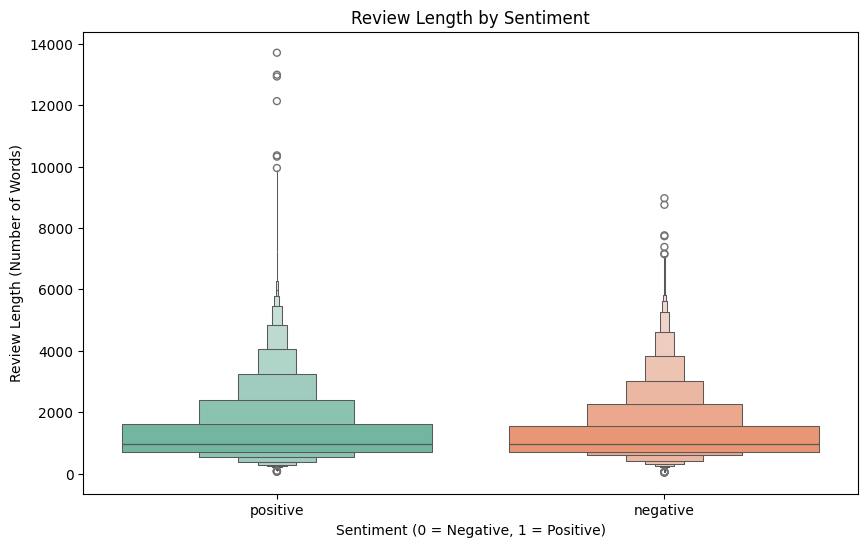

In [32]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=data, x='sentiment', y='review_length', palette='Set2')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Review Length (Number of Words)")
plt.show()


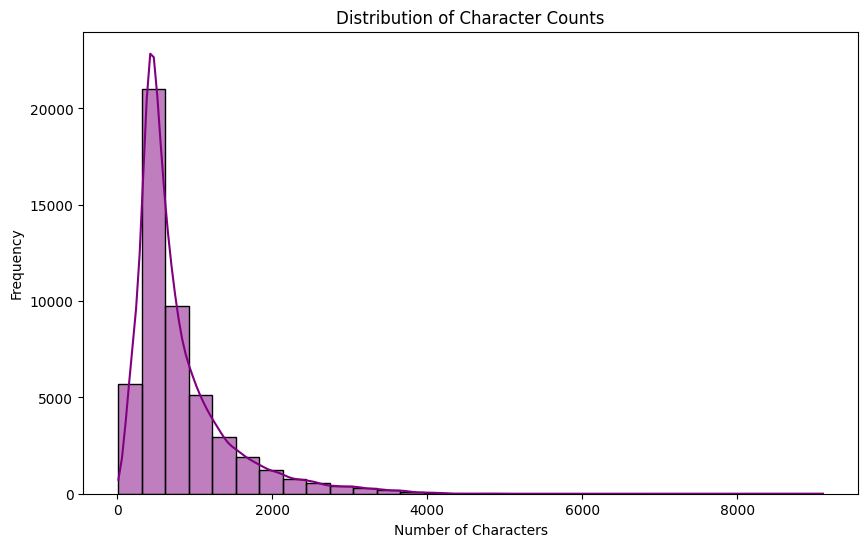

Average Character Count (Positive): 818.59
Average Character Count (Negative): 783.25


In [34]:
data['char_count'] = data['cleaned_review'].apply(len)

# Plot the distribution of character counts
plt.figure(figsize=(10, 6))
sns.histplot(data['char_count'], bins=30, kde=True, color='purple')
plt.title("Distribution of Character Counts")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# Compare average character counts for positive and negative reviews
avg_chars_positive = data[data['sentiment'] == 'positive']['char_count'].mean()
avg_chars_negative = data[data['sentiment'] == 'negative']['char_count'].mean()

print(f"Average Character Count (Positive): {avg_chars_positive:.2f}")
print(f"Average Character Count (Negative): {avg_chars_negative:.2f}")


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text into BoW representation
bow_vectorizer = CountVectorizer(max_features=5000)  # Limit vocabulary size to 5000
X_bow = bow_vectorizer.fit_transform(data['cleaned_review'])

print("\nBoW Representation:")
print(X_bow.toarray()[:5])  # Display first 5 reviews as BoW vectors



BoW Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]]


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF representation
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(data['cleaned_review'])

print("\nTF-IDF Representation:")
print(X_tfidf.toarray()[:5])  # Display first 5 reviews as TF-IDF vectors



TF-IDF Representation:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.22339469 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [14]:
from gensim.models import Word2Vec
import numpy as np
tokenized_reviews = [review.split() for review in data['cleaned_review']]

w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

def get_w2v_vectors(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X_w2v = np.array([get_w2v_vectors(tokens, w2v_model) for tokens in tokenized_reviews])

print("\nWord2Vec Representation:")
print(X_w2v[:5])  # Display first 5 reviews as Word2Vec vectors



Word2Vec Representation:
[[-1.73074547e-02  3.42271179e-01  1.82124823e-01 -4.90116060e-01
  -3.34851332e-02  1.00100614e-01 -2.27628052e-02  4.29646909e-01
  -1.03571683e-01  1.07025750e-01 -3.14790569e-02 -3.54415506e-01
   1.20690748e-01 -2.85590850e-02  1.50523320e-01 -1.46225289e-01
   3.86700332e-02 -3.92349750e-01 -1.45438373e-01 -7.05375850e-01
   4.69267398e-01  5.17121069e-02 -2.09018663e-01  1.60229430e-01
  -5.18691182e-01 -1.62148356e-01 -4.47578520e-01  4.02610272e-01
  -1.79342747e-01  3.61669481e-01  2.23814219e-01 -2.36969352e-01
   1.16177075e-01 -4.82340872e-01 -2.87240714e-01  2.16322601e-01
   4.26883310e-01  5.72501048e-02 -4.41499352e-01  2.20245034e-01
  -1.63225248e-01 -1.65655106e-01 -4.87803891e-02  3.36997479e-01
   3.17811787e-01 -5.14357984e-01  6.33681536e-01  1.08641297e-01
  -1.58599094e-01  3.99474055e-01  3.64864111e-01 -2.54790876e-02
  -1.54167831e-01  2.60171801e-01 -1.31745161e-02  4.48425151e-02
   4.96726274e-01 -6.01084568e-02  8.25951919e-02 

Accuracy:  0.8506


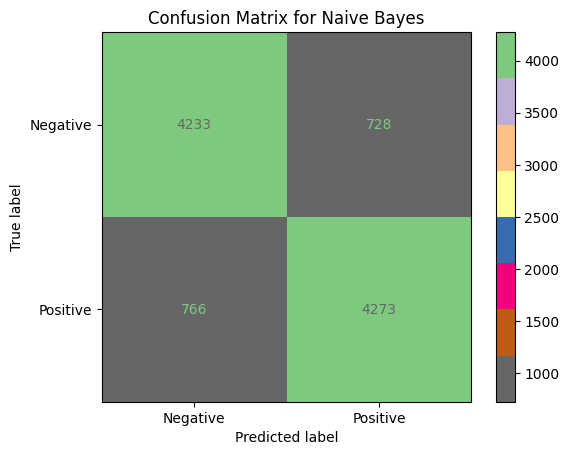

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: Assume y_test contains true labels and y_pred contains predictions
y = data['sentiment'].map({'positive': 1, 'negative': 0})  # Convert sentiments to binary (1, 0)
X = X_bow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def plot_confusion_matrix(y_test, y_pred, model_name):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap='Accent_r', values_format='d')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Example for a specific model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)  
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, "Naive Bayes")


Accuracy:  0.8353


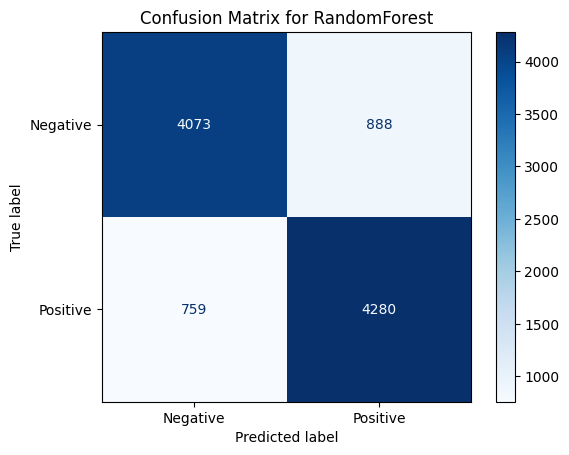

In [22]:
y = data['sentiment'].map({'positive': 1, 'negative': 0})  # Convert sentiments to binary (1, 0)
X = X_w2v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def plot_confusion_matrix(y_test, y_pred, model_name):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap='blues', values_format='d')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Example for a specific model

model = RandomForestClassifier()
model.fit(X_train, y_train)  
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, "RandomForest")



Accuracy:  0.875


c:\Users\amuke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


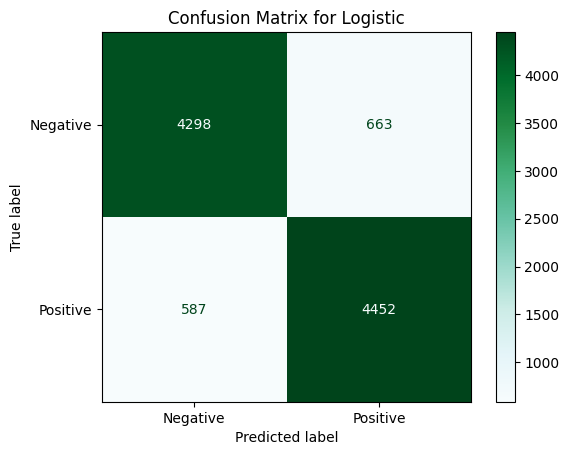

In [41]:
y = data['sentiment'].map({'positive': 1, 'negative': 0})  # Convert sentiments to binary (1, 0)
X = X_bow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def plot_confusion_matrix(y_test, y_pred, model_name):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap='BuGn', values_format='d')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Example for a specific model

model = LogisticRegression()
model.fit(X_train, y_train)  
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, "Logistic")